In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
app_df=pd.read_csv('/content/applicant.csv')
loan_df=pd.read_csv('/content/loan.csv')

## EDA

# Dealing with missing values(EDA)

In [58]:
app_df
## checking for missing values
app_df.isna().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

In [59]:
## visualizing missing values column wise
#missing values % in each column
def missing(df):
    dict_missing_perc={}
    dict_missing_count={}
    for column in df.columns:
        dict_missing_perc[column]=round((df[column].isna().sum()*100/df.shape[0]),2)
        dict_missing_count[column]=df[column].isna().sum()
    sorted_perc=sorted(list(dict_missing_perc.values()),reverse=True)
    sorted_count=sorted(list(dict_missing_count.values()),reverse=True)
   
  
    data_frame=pd.DataFrame({"Column_name":list(dict_missing_perc.keys()),
                             '% missing values':list(dict_missing_perc.values()),
                             'missing_value_count':list(dict_missing_count.values())})
    #data_frame.index=list(dict_missing_perc.keys())
    data_frame.sort_values(by='% missing values',axis=0,ascending=False,inplace=True)
    data_frame=data_frame.style.background_gradient(cmap='rainbow_r')
    
    return data_frame

In [60]:
app_df['Employment_status'].value_counts()

skilled employee / official                                         630
unskilled - resident                                                200
management / self-employed / highly qualified employee / officer    148
unemployed / unskilled - non-resident                                22
Name: Employment_status, dtype: int64

In [61]:
missing(app_df)

In [62]:
## replacing missing values in 'Has_been_employed_for_at_most','Has_been_employed_for_at_lease' column by mode of column but
# these values can also be replaced by  using Employment_status, Primary_applicant_age_in_years 
app_df['Has_been_employed_for_at_most']=app_df['Has_been_employed_for_at_most'].fillna('4 years')
app_df['Has_been_employed_for_at_least']=app_df['Has_been_employed_for_at_least'].fillna('1 year')

In [63]:
# replacing missing values in 'Savings_account_balance' by  a new category 'very low'
app_df['Savings_account_balance']=app_df['Savings_account_balance'].fillna('very low')

In [64]:
## as most of values in 'Balance_in_existing_bank_account_(lower_limit_of_bucket)' and 'Balance_in_existing_bank_account_(upper_limit_of_bucket)'
# columns are missing so dropping them, but those can be replaced with appropriate values by taking help of other features
app_df=app_df.drop(columns=['Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)'])

In [65]:
## as Telephone columns contains info about whether person has telephone connection or not
## so replacing missing values with no .i.e. doesn't have connection
app_df['Telephone']=app_df['Telephone'].fillna('No')


In [66]:
## missing values in loan
missing(loan_df)

In [67]:
## even though 'Other_EMI_plans' column has more than 80% missing values I am replacing
# those with a new category 'No emi plans', as it is obvious we fill 'NA' when we don't have other emi plans
## same for 'Property' column
loan_df['Other_EMI_plans']=loan_df['Other_EMI_plans'].fillna('No Emi Plans')
loan_df['Property']=loan_df['Property'].fillna('No property')
## for 'Purpose' I am replacing with mode, but a better way will be to take help of ohter 
#features(like Principal_loan_amount)
loan_df['Purpose']=loan_df['Purpose'].fillna('electronic equipment')

In [68]:
df=pd.merge(app_df,loan_df,on=['applicant_id'],how='inner')
missing(df)

In [69]:
## as application_id,loan_application_id is unique for each applicant so dropping them
df=df.drop(['applicant_id','loan_application_id'],axis=1)

creating derived features

In [70]:
df.columns

Index(['Primary_applicant_age_in_years', 'Gender', 'Marital_status',
       'Number_of_dependents', 'Housing', 'Years_at_current_residence',
       'Employment_status', 'Has_been_employed_for_at_least',
       'Has_been_employed_for_at_most', 'Telephone', 'Foreign_worker',
       'Savings_account_balance', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

# Univariate Analysis

## some of the numerical features even they contain numerical values can be represented in better way if they are considered as categorical

In [71]:
## from above conclusion I can say only two features'Primary_applicant_age_in_years' and ''Principal_loan_amount'
# are continuous and remaining numerical variables are not continuous in nature

In [72]:
## for continuous variables
def hist_plot(col):
  plt.figure(figsize=(10,5))
  sns.distplot(df[col],color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


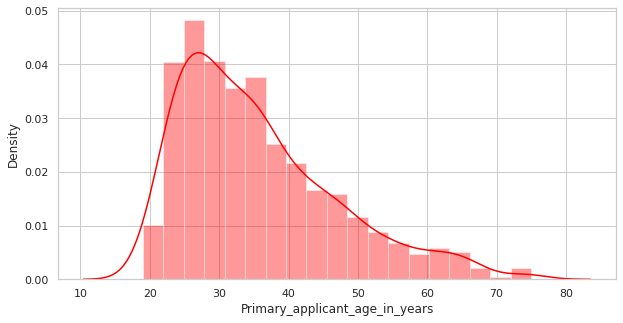

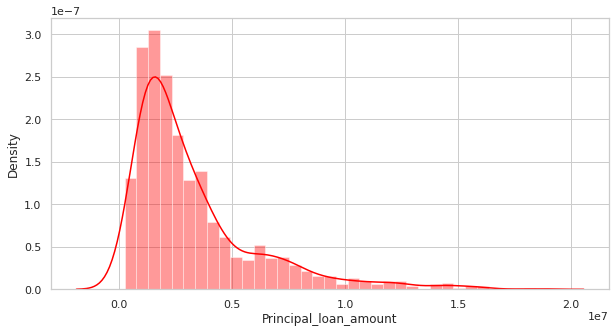

In [73]:
hist_plot('Primary_applicant_age_in_years')
hist_plot('Principal_loan_amount')

In [74]:
## creating new features
# whether applicant has something which can be used as mortgage
df['mortgage']=df['Property'].apply(lambda x: 0 if x==0 else 1)

#based on Months_loan_taken_for I am creating new feature 
# if loan taken for less than 12 months-short term, between 12 to 36 months medium term, more than 36months -long term
# and converting those to numerical values
df['term_of_loan']=df['Months_loan_taken_for'].apply(lambda x: 10 if x<12 else 5 if x>=12 and x<=36 else 0 )

# creating new feature type of loan based on Purpose
# business_loan, necessity_loan, luxury
def convert(val):
  if val=='used vehicle' or val=='repair costs' or val=='education' or val=='career development':
    return 'necessity'
  elif val=='business' or val=='FF&E':
    return 'business'
  else:
    return 'luxury'

df['type_of_loan']=df['Purpose'].apply( lambda x:convert(x))

# creating new feature based on principal amount
# if principal amount is less than 30 lacs then low_value(0), if between 30 to 70 lacs medium_value(5), more than 70 lacs
# high value(10)
df['loan_value']=df['Principal_loan_amount'].apply(lambda x: 10 if x>7000000 else (5 if x>=3000000 and x<=7000000  else 0))

# creating new feature 'risk_taking_tendency' based on age of applicants(youth maximum, adults medium, senior citizens low)
# if age less than 30 then youth, if age in between 30 to 55 youth, if age more than 55 senior
# max_risk=10, medium=5 , low_risk_tendency=0
df['risk_taking_tendency']=df['Primary_applicant_age_in_years'].apply(lambda x: 10 if x<25 else (5 if x>=25 and x<55 else 0))

 Bivariate analysis for few of the features

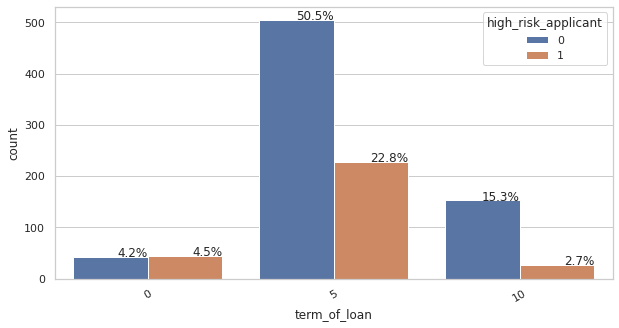

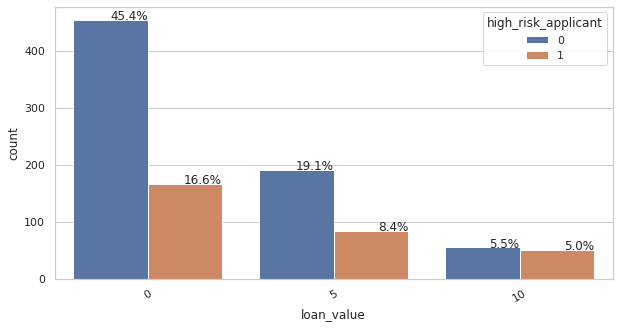

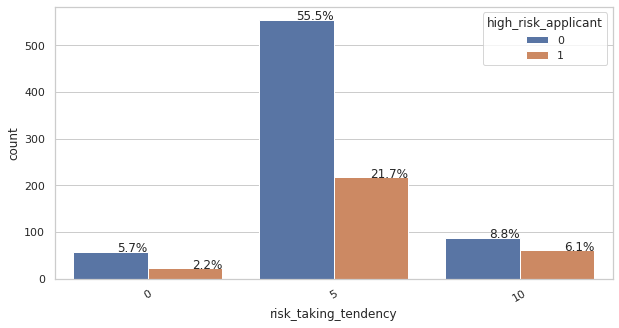

In [75]:
for col in ['term_of_loan','loan_value','risk_taking_tendency']:
  if col:
    #sns.set(style="whitegrid")
    plt.figure(figsize=(10,5))
    total = float(len(df))
    ax = sns.countplot(x=col, hue="high_risk_applicant", data=df)

    for p in ax.patches:
        total=len(df)
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='right')
        plt.xticks(rotation=30)
    plt.show()
    

Observations from this analysis

In [76]:
## applicants which are adults(age>25 age<55) and senior-citizens(age>55) are having less default %
# (approx 28%) are defualtors
## applicants which are less than 25 are having more default incidents i.e about 41% are defaultors

In [77]:
## applicants who are taking loan  of more than 70 lacs about 48% are defaultors
## applicants who are taking loan of more than 30 lacs and less than 70 lacs about 30% are defaultors
## applicants who are taking loan of less than 30lacs only 27% are defaultors

In [78]:
## short term loan applicants (loan taken for less than a year) only 15% are defaultors
# medium term loan applicants (loan taken for 1 to 3 years) about 31% are defaultors
# long term loan applicants (loan taken for more than 5 years) about 52% are defaultors

In [79]:
## features are highly skewed, so using some transformation to reduce skewness
from scipy.stats import boxcox
df['Primary_applicant_age_in_years'],_=boxcox(df['Primary_applicant_age_in_years'])
df['Principal_loan_amount'],_=boxcox(df['Principal_loan_amount'])


In [80]:
## I tried sqrt,log,boxcox transformation and boxcox is giving better results


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


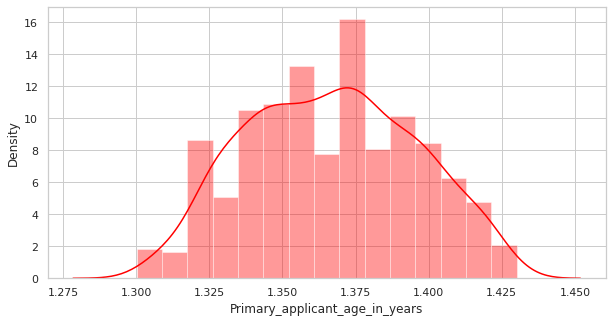

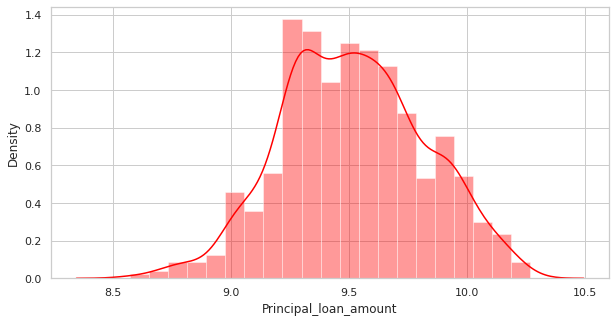

In [81]:
hist_plot('Primary_applicant_age_in_years')
hist_plot('Principal_loan_amount')

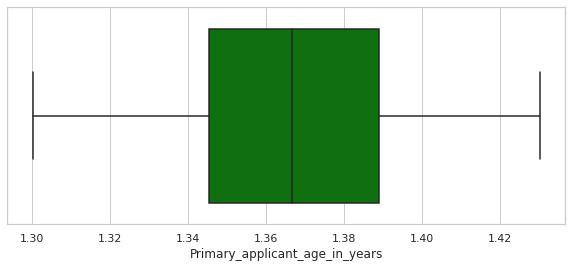

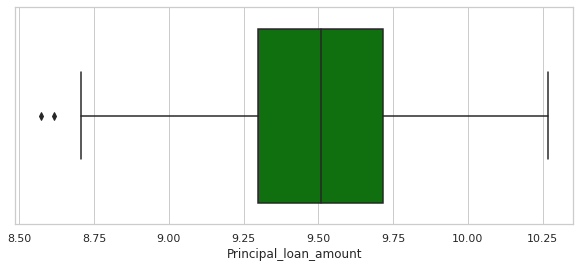

In [82]:
## box plot for outlier detecion
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Primary_applicant_age_in_years'],color='green')
plt.show()
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Principal_loan_amount'],color='green')
plt.show()

In [83]:
 
## from boxplot(After applying boxcox transformation) it is evident there are only 2 outliers in 'Principal_loan_amount' feature
## and Primary_applicant_age_in_years doesn't have outliers

In [84]:
from sklearn.preprocessing import LabelEncoder

## Bi-variate analysis(predictor variables v/s target variables)

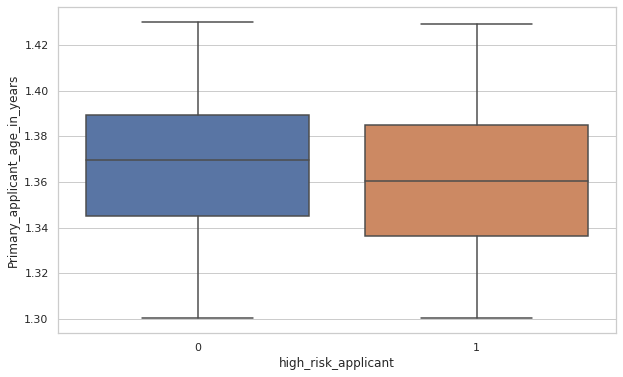

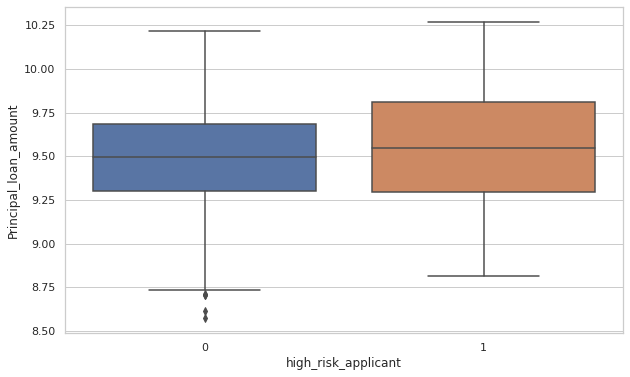

In [85]:
## Bi-variate analysis( between continuous predictor variables and target)
def box_plot(col):

  plt.figure(figsize=(10,6))
  sns.boxplot(y=df[col],x=df['high_risk_applicant'])
  plt.show()
box_plot('Primary_applicant_age_in_years')
box_plot('Principal_loan_amount')

In [86]:
for col in df.columns:
  if col!='Principal_loan_amount' and col!='Primary_applicant_age_in_years':
    df[col]=df[col].astype('object')

In [87]:
df.columns

Index(['Primary_applicant_age_in_years', 'Gender', 'Marital_status',
       'Number_of_dependents', 'Housing', 'Years_at_current_residence',
       'Employment_status', 'Has_been_employed_for_at_least',
       'Has_been_employed_for_at_most', 'Telephone', 'Foreign_worker',
       'Savings_account_balance', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'mortgage', 'term_of_loan', 'type_of_loan',
       'loan_value', 'risk_taking_tendency'],
      dtype='object')

In [88]:
new_df=df[['Housing','Marital_status','Employment_status','Gender','high_risk_applicant']]
new_df['mar_employ']=0
new_df['employment_gender']=0
new_df['Employment_housing']=0
for i in range(len(df)):
  new_df['mar_employ'][i]=df['Marital_status'][i]+' '+df['Employment_status'][i]
  new_df['employment_gender'][i]= df['Gender'][i]+' '+df['Employment_status'][i]
  new_df['Employment_housing'][i]=df['Housing'][i]+' '+df['Employment_status'][i]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

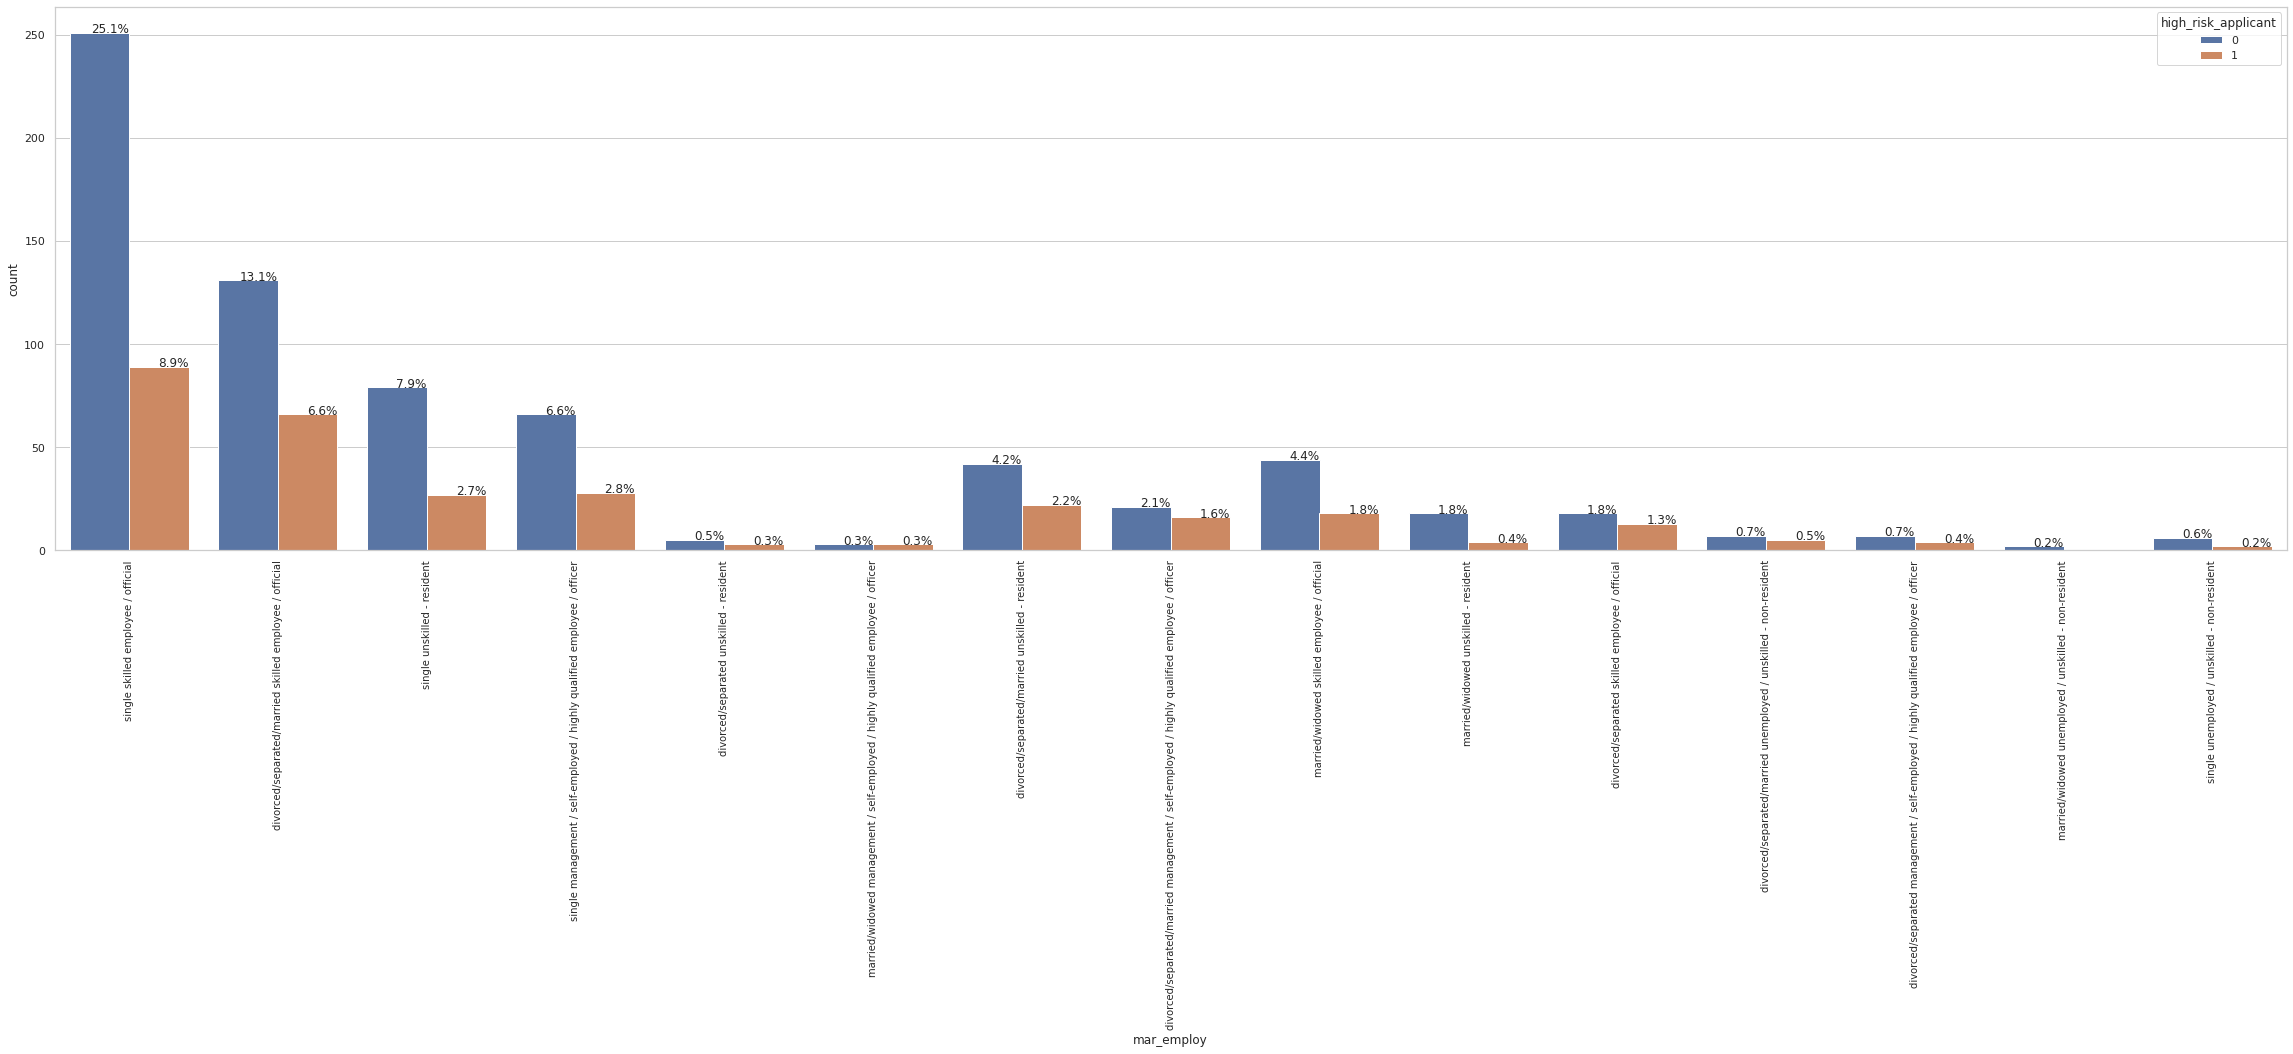

In [89]:
for col in ['mar_employ']:
  if new_df[col].dtype=='object':
    sns.set(style="whitegrid")
    plt.figure(figsize=(40,10))
    total = float(len(df))
    ax = sns.countplot(x=col, hue="high_risk_applicant", data=new_df)

    for p in ax.patches:
        total=len(df)
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='right')
        plt.xticks(rotation=90,size=10)
    plt.show()

In [90]:
## out of total applicants who are married/widowed and management / self-employed / highly qualified employee / officer
 # 50% of them are defaultors which is maximum 
# out of total applicants who are divorced/seperated and unskilled - resident about 38% of them are defaultors

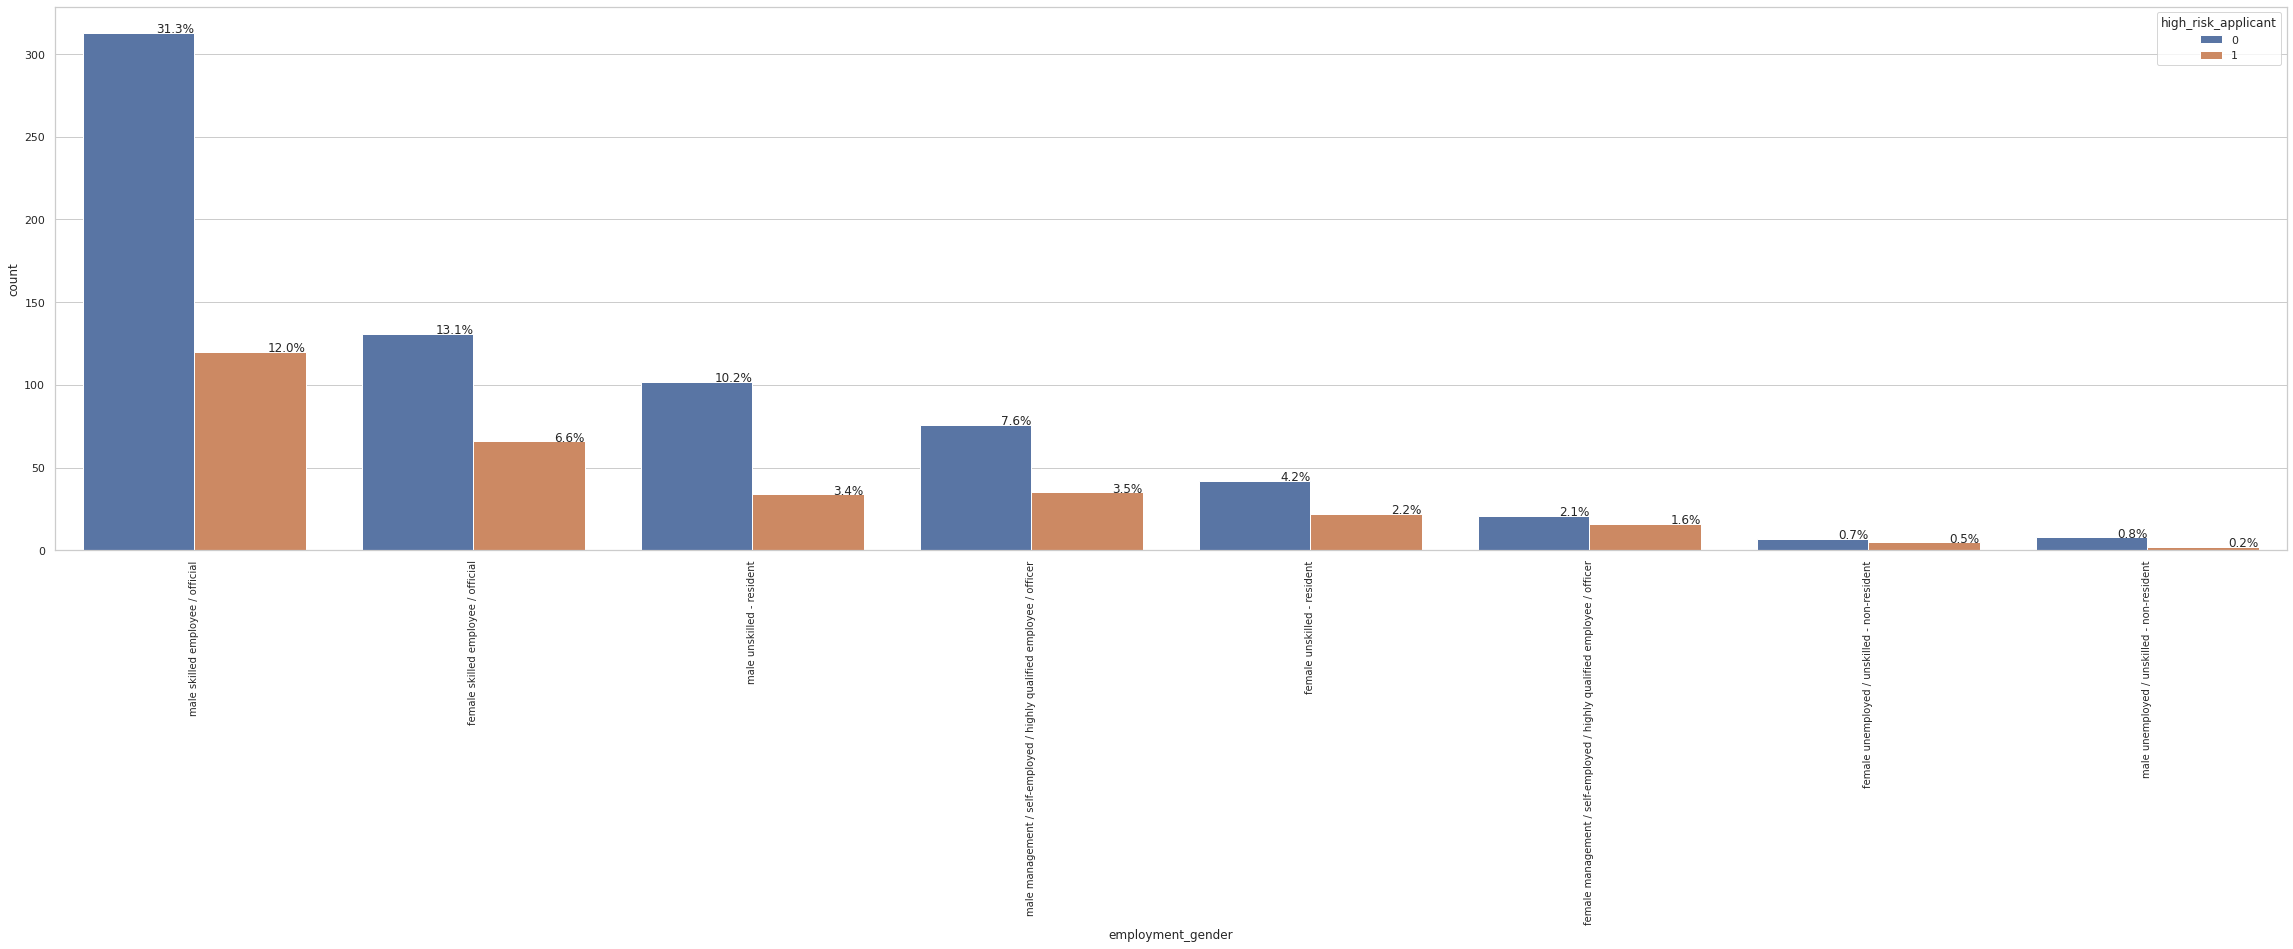

In [91]:
for col in ['employment_gender']:
  if new_df[col].dtype=='object':
    sns.set(style="whitegrid")
    plt.figure(figsize=(40,10))
    total = float(len(df))
    ax = sns.countplot(x=col, hue="high_risk_applicant", data=new_df)

    for p in ax.patches:
        total=len(df)
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='right')
        plt.xticks(rotation=90,size=10)
    plt.show()

In [92]:
## out of total applicants who are female and management / self-employed / highly qualified employee / officer
 # 43% of them are defaultors 
# out of total applicants who are female and unemployed/unskilled - non-resident about 43% of them are defaultors

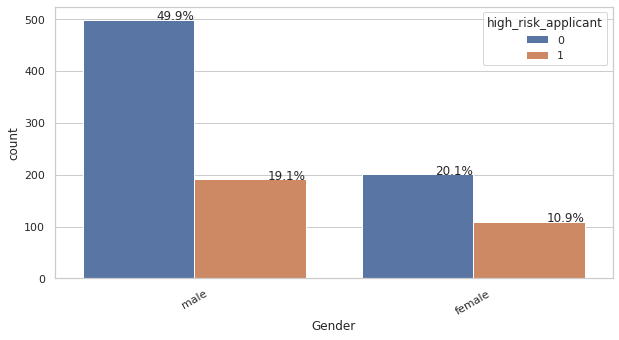

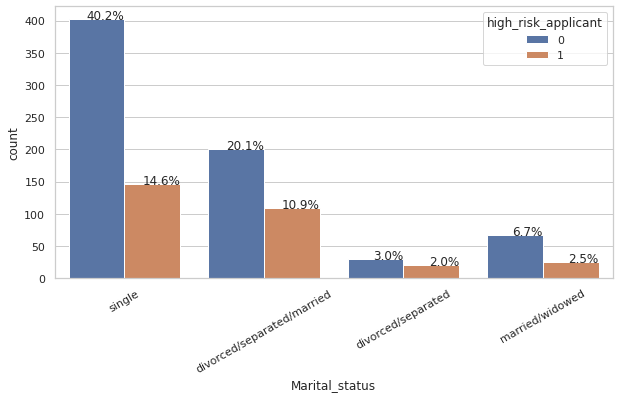

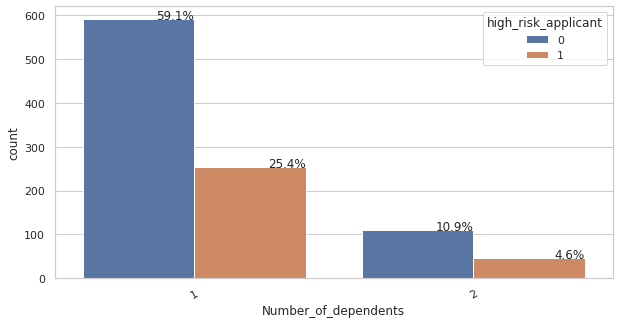

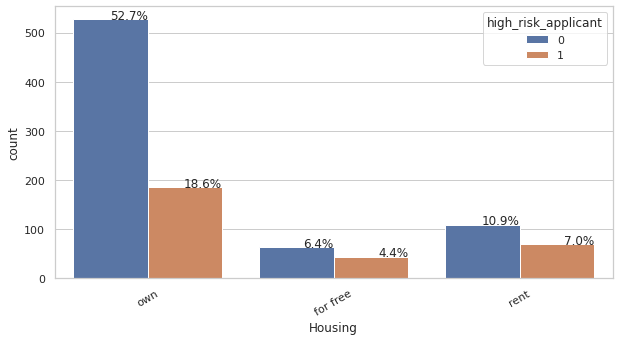

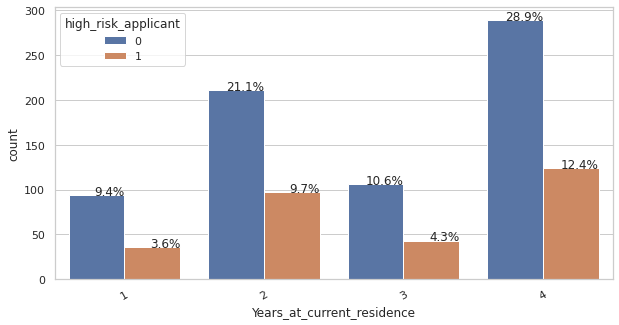

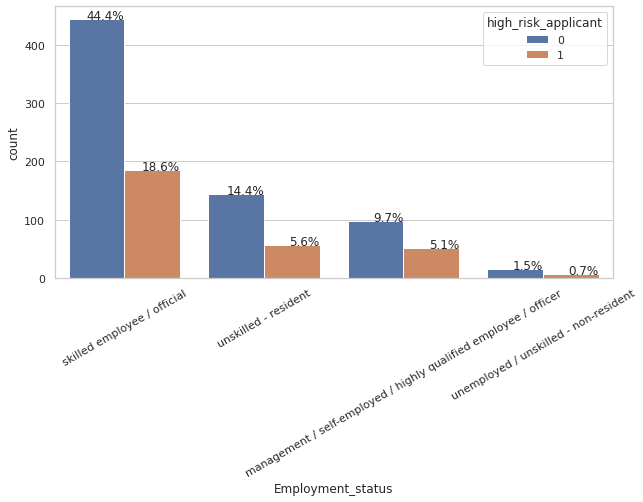

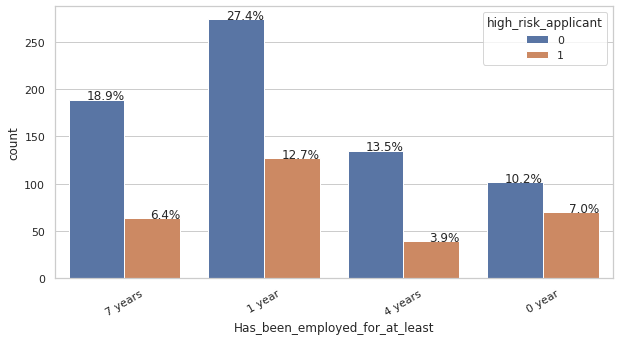

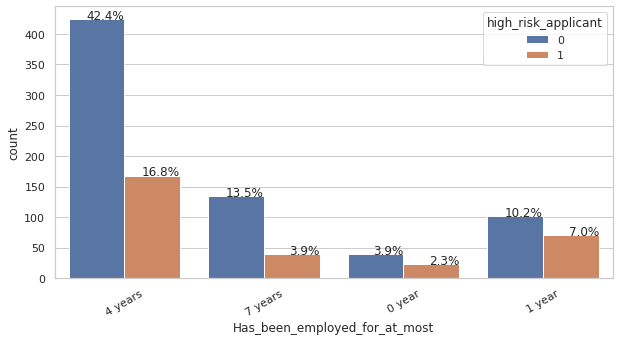

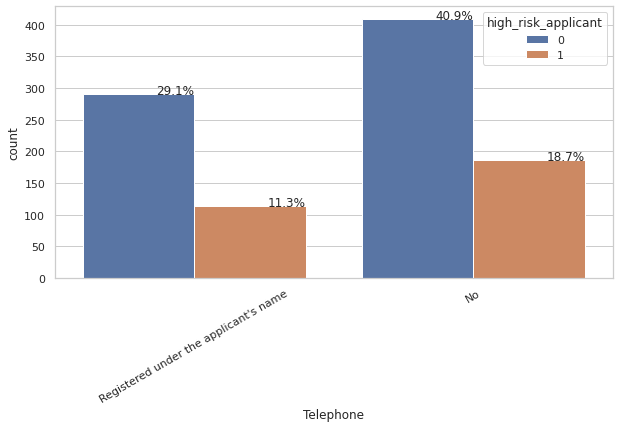

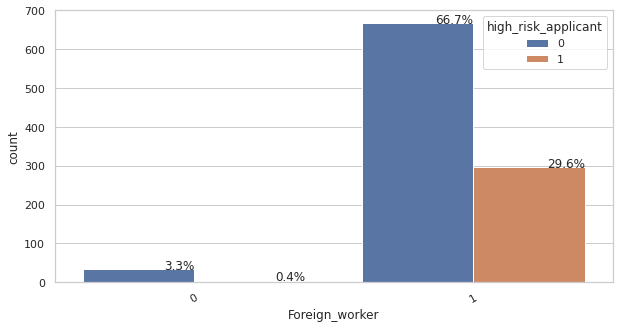

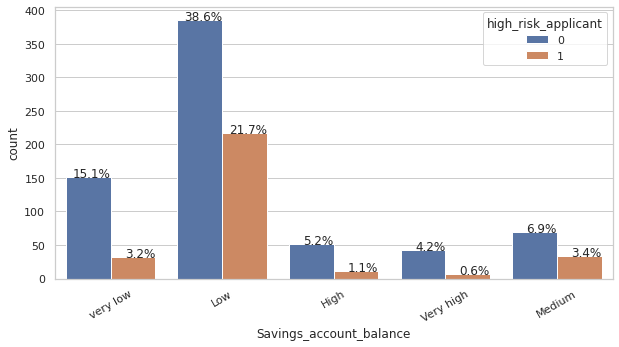

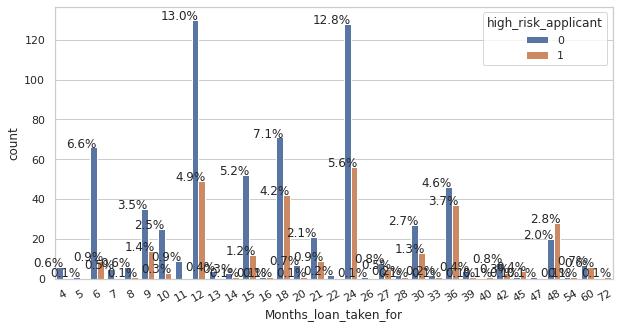

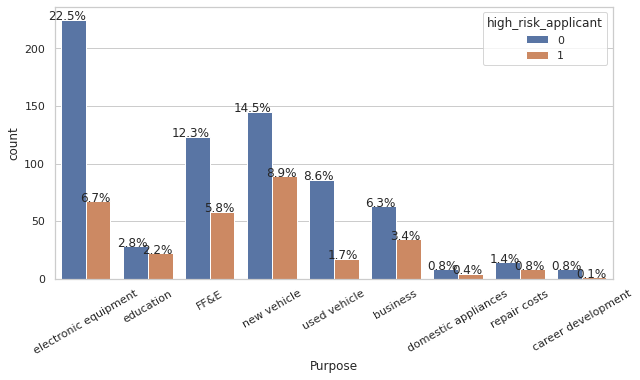

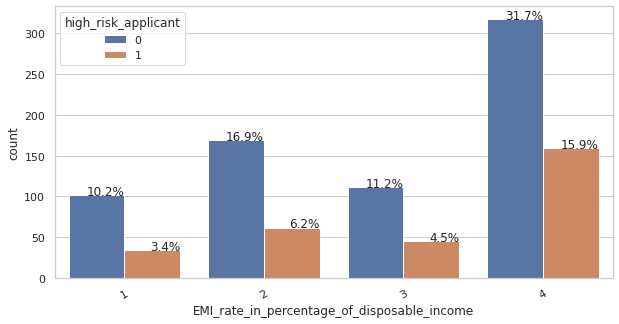

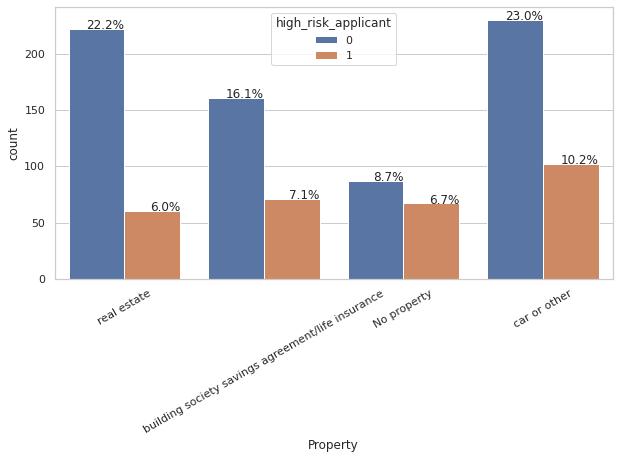

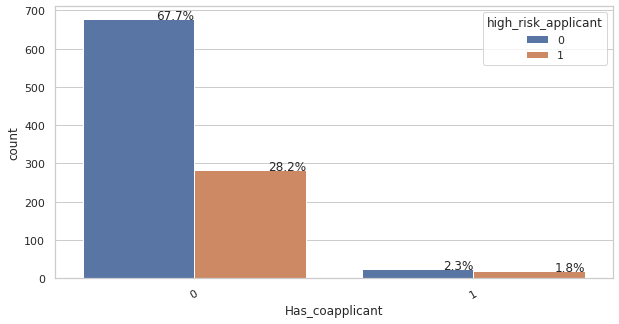

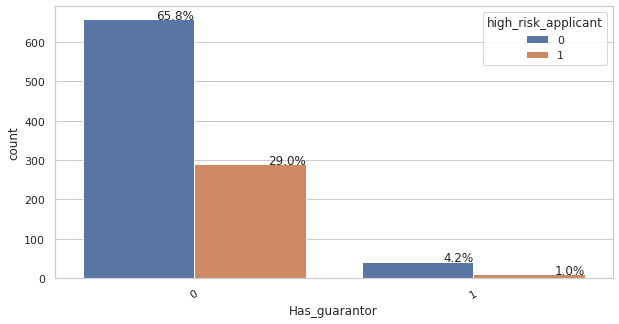

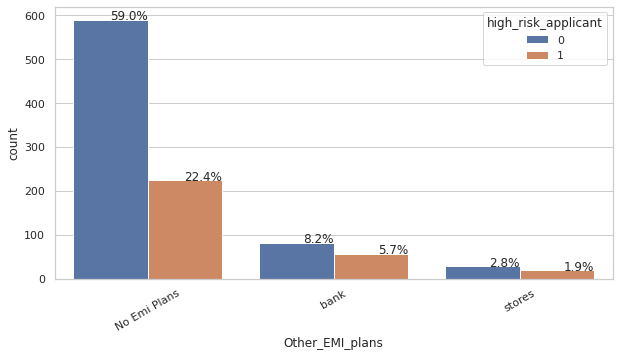

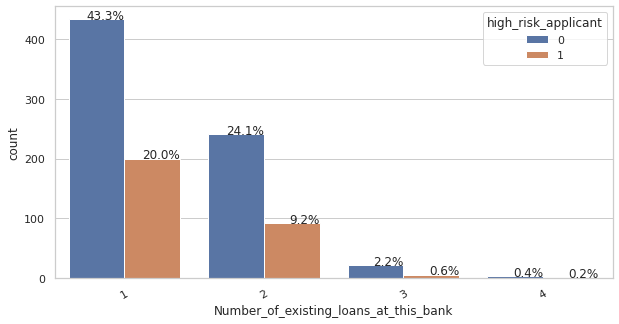

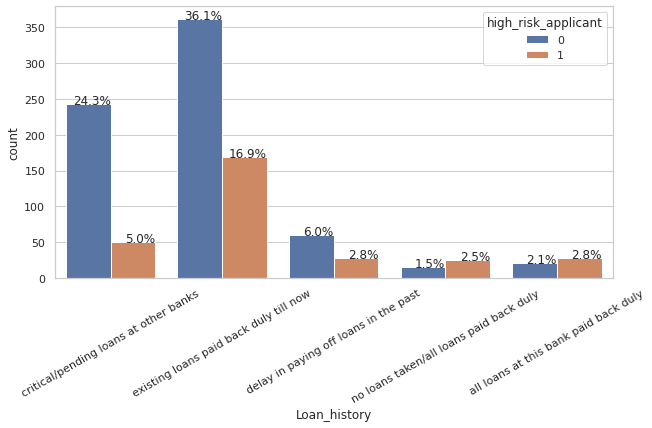

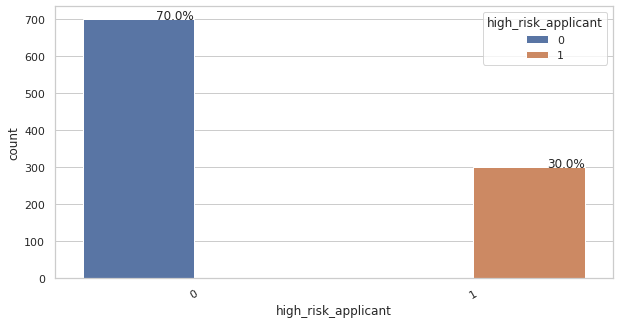

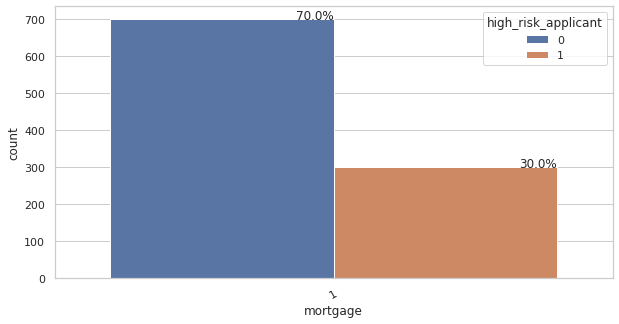

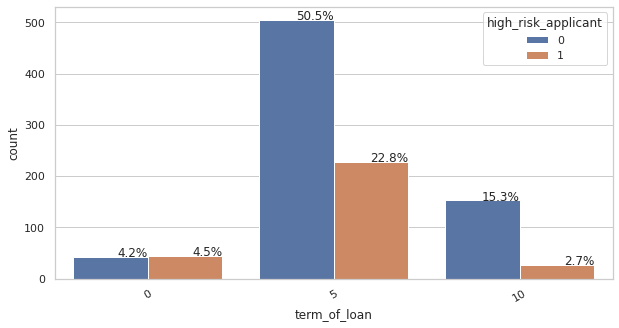

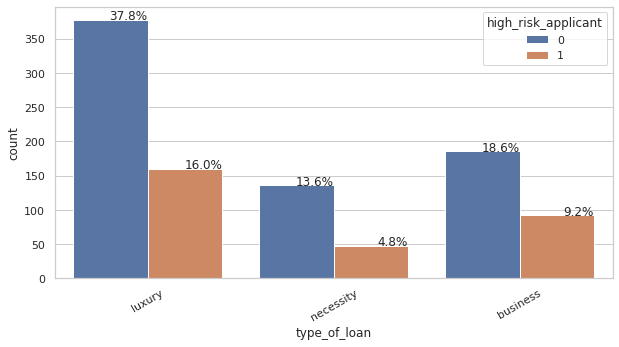

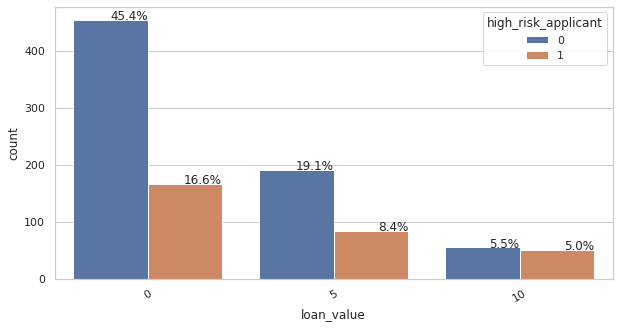

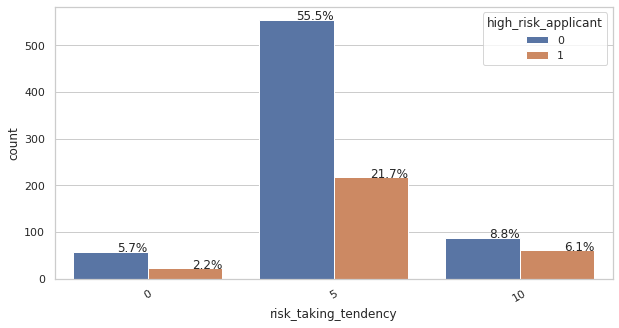

In [93]:
#
for col in df.columns:
  if df[col].dtype=='object':
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,5))
    total = float(len(df))
    ax = sns.countplot(x=col, hue="high_risk_applicant", data=df)

    for p in ax.patches:
        total=len(df)
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='right')
        plt.xticks(rotation=30)
    plt.show()

In [94]:
## Observations from categorical variables
## 1.Out of total loans education_loan are highly risky i.e. loan for educational purposes are more likely to be default

## 2. Out of total applicants applicants with no property are high_risk_applicants( about 44% are high_risk_applicants)

## 3.Out of total applicants with No Emi Plans are less_risk_applicants(about 73% are less risk applicants) 
# out of total applicants who have Bank/stores emis are approximately equally risky(about 41% are high_risk_applicants)

## 4. Out of total applicants who have paidback duly/no loans taken about 62.5% are high_risk_applicants
# Out of total applicants who have paidback all loans at this bank about 58% are high_risk_applicants

#5.Out of total male applicants about 73% are less_risk_applicant, and around 27% are high_risk_applicant
# for females 66% are less_risk_applicant and around 34% are high_risk_applicant

#6. Out of total single applicants about 73% are less_risk_applicant and about 27% are high_risk
#Out of total divorced/seperated/married about 65% are less risk and remaining 35% are high_risk
# Out of total divorced/seperated about 60% are less risk and remaining 40% are high_risk
#Out of total married/widowed about 73% are less risk and remaining 27% are high_risk

#7. Out of total applicants who own house about 74% are less_risk_applicant and 26% are high_risk
# Out of total applicants who are living for free about 59% are less_risk_applicant and 41% are high_risk
#Out of total applicants who live on rent  about 62% are less_risk_applicant and 38% are high_risk_applicant

#8. Out of total skilled employee/official about 70% are less_risk_applicant and about 30% are high_risk
# Out of total unskilled/resident applicants about 72% are less_risk_applicant and about 28% are high_risk 

## Converting categorical variables to numerical values, I am using OneHot,Label Encoding as well as manually doing some of the encoding as per understanding of dataset

In [95]:
# manual encoding and label encoding is used for features which are ordinal in nature 
#i.e. there is some kind of order in values of features
df[ 'Loan_history']=df[ 'Loan_history'].map({'existing loans paid back duly till now':10,
                                             'no loans taken/all loans paid back duly':8,
                                             'all loans at this bank paid back duly':6,
                                             'critical/pending loans at other banks':3,
                                             'delay in paying off loans in the past':1})

df['Housing']=df['Housing'].map({'own':10,'rent':6,'for free':2})

df['Employment_status']=df['Employment_status'].map({'management / self-employed / highly qualified employee / officer':10,
                                                     'skilled employee / official':7,
                                                     'unskilled - resident':4,
                                                     'unemployed / unskilled - non-resident':2})

le=LabelEncoder()
df['Has_been_employed_for_at_least']=le.fit_transform(df['Has_been_employed_for_at_least'].values)
le=LabelEncoder()
df['Has_been_employed_for_at_most']=le.fit_transform(df['Has_been_employed_for_at_most'].values)

df[ 'Savings_account_balance']=df[ 'Savings_account_balance'].map({'Very high':10,'High':7,
                                                                   'Medium':5,'Low':3,'very low':1})

df[ 'Property']=df[ 'Property'].map({'real estate':10,'building society savings agreement/life insurance':7,
                                     'car or other':4,'No property':1})

# Multivariate

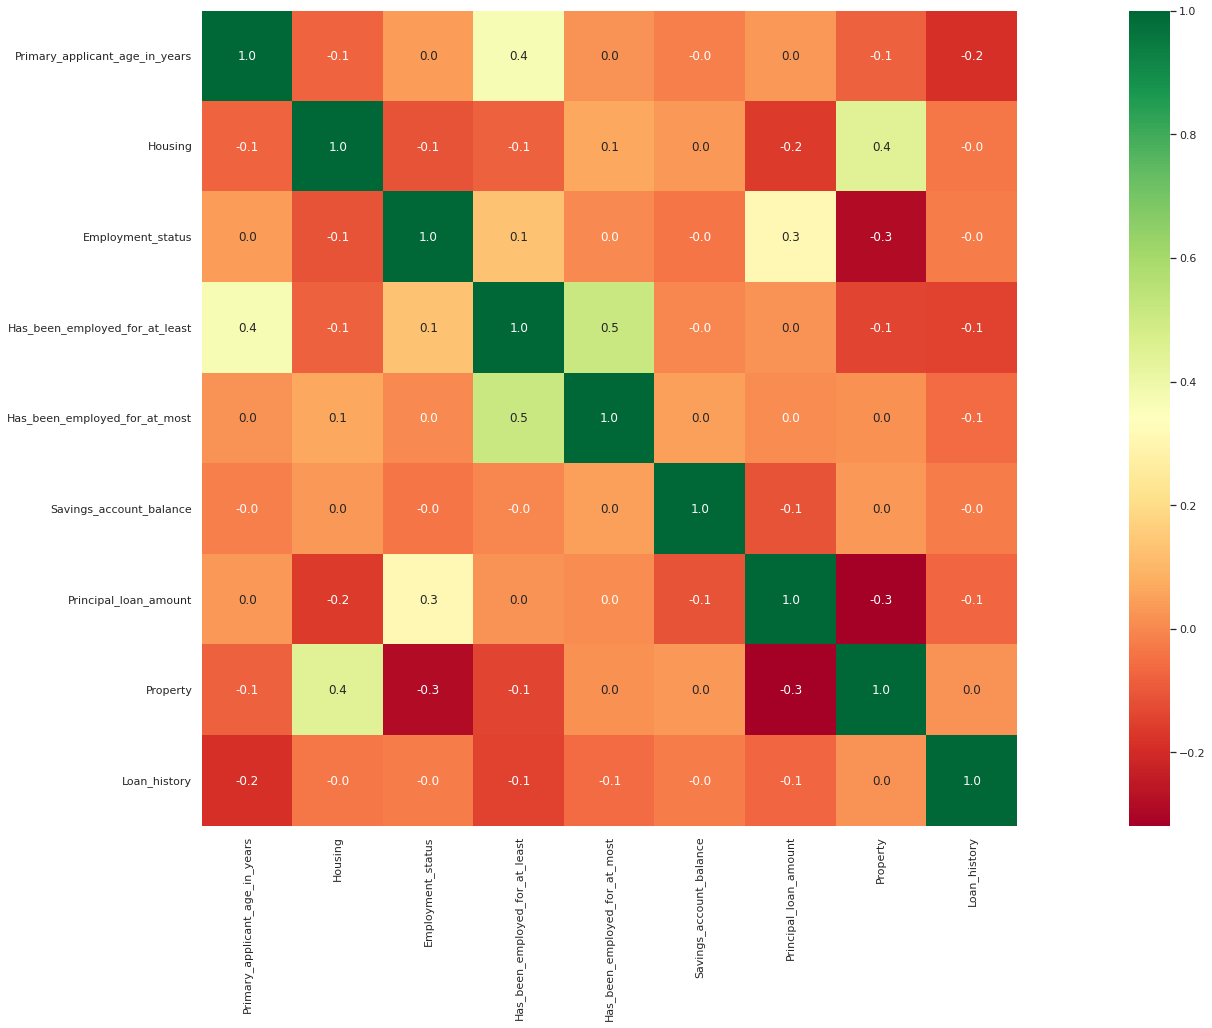

In [96]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(40, 15))
sns.heatmap(corr, vmax=1, square=True,annot=True, fmt='.1f',cmap='RdYlGn');

In [97]:
## from heat map it is evident that we are not facing multicolinearity problem 
## i.e independent variables are not highly correlated
## for  more surity we can go for VarianceInflationFactor(vif)